# **Important Python Libraries :**

- **Librosa** : Python lib that provides tools used for audio processing (like analyzing & extracting info)

- **Soundfile** : Python lib used for reading and writing sound files (specially audio data)

- **Noisreduce** : Python lib that uses a noise reduce algo called "spectral gating" to remove noise from audio


In [ ]:
import gc
gc.collect()

106

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
pip install librosa

In [ ]:
pip install soundfile

In [ ]:
pip install noisereduce

In [ ]:
!pip install SpeechRecognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 35.2 MB/s eta 0:00:00


In [ ]:
!pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 8.7 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=0eeb26075b2ad007c8182c3c7ae275f81a663bc3acad89588c5d46248bdcf97e
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling 

In [ ]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 639.9 kB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


In [ ]:
!pip install gTTS

In [ ]:
import IPython
from scipy.io import wavfile
import noisereduce as nr
import soundfile as sf
from noisereduce.generate_noise import band_limited_noise
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import io
import librosa
import subprocess
# import boto3
%matplotlib inline

In [ ]:
import openai

# Set up your OpenAI API key
api_key = "<MY-API-KEY>"
openai.api_key = api_key

In [ ]:
options = {1: "English", 2: "Hindi", 3:"Telugu"}

In [ ]:
language_choice = int(input("choose your option = "))

choose your option = 1


In [ ]:
prefix = f"/content/test-audio-{language_choice}"

In [ ]:
url1 = f"{prefix}.mp3"

In [ ]:
url2 = "/content/TTS Project 2.wav"

In [ ]:
url3 = "/content/TTS Project 3.wav"

In [ ]:
data1, rate1 = librosa.load(url1)

In [ ]:
IPython.display.Audio(data=data1, rate=rate1)

In [ ]:
data2, rate2 = librosa.load(url2)
data3, rate3 = librosa.load(url3)

In [ ]:
IPython.display.Audio(data=data2, rate=rate2)

In [ ]:
IPython.display.Audio(data=data3, rate=rate3)

In [ ]:
# this code is used to detect the hindi audio on it's own
# HINDI
import speech_recognition as sr

recognizer = sr.Recognizer()

with sr.AudioFile(url2) as source:
    audio = recognizer.record(source)

hindi_text = recognizer.recognize_google(audio, language="hi-IN")

print(hindi_text)

अरे यह एक परीक्षण फाइल है जहां मैं इसे टेक्स्ट में बदलने के लिए इस ऑडियो का उपयोग करूंगा


In [ ]:
from googletrans import Translator

translator = Translator()
english_text = translator.translate(hindi_text, src="hi", dest="en").text
print(english_text)

Hey this is a test file where I will use this audio to convert it into text


In [ ]:
# TELUGU
import speech_recognition as sr
from googletrans import Translator
from gtts import gTTS

recognizer = sr.Recognizer()

language_code = "te"  # Telugu language code
#'de' - german
#'zh-CN' -chinese

with sr.AudioFile(url3) as source:
    audio = recognizer.record(source)

# Translate the text to English
translator = Translator()
translated_text = translator.translate(recognizer.recognize_google(audio), src=language_code, dest="en").text

# Convert the translated text to English audio
english_audio = gTTS(translated_text)
english_audio.save("english_audio.mp3")

print(f"Translation to English: {translated_text}")


Translation to English: Hey hello no name manchester no


## **Removing Stationary Noise**
  - only uses the intially estimated noise threshold

- ***Stationary Noise*** - noise whose statistical properties (like mean, variance, and autocorrelation) remain constant over time.

    *Ex* : Humming Noise

In [ ]:
reduced_noise_st1 = nr.reduce_noise(y=data1, sr=rate1, n_std_thresh_stationary=0.75, stationary=True)

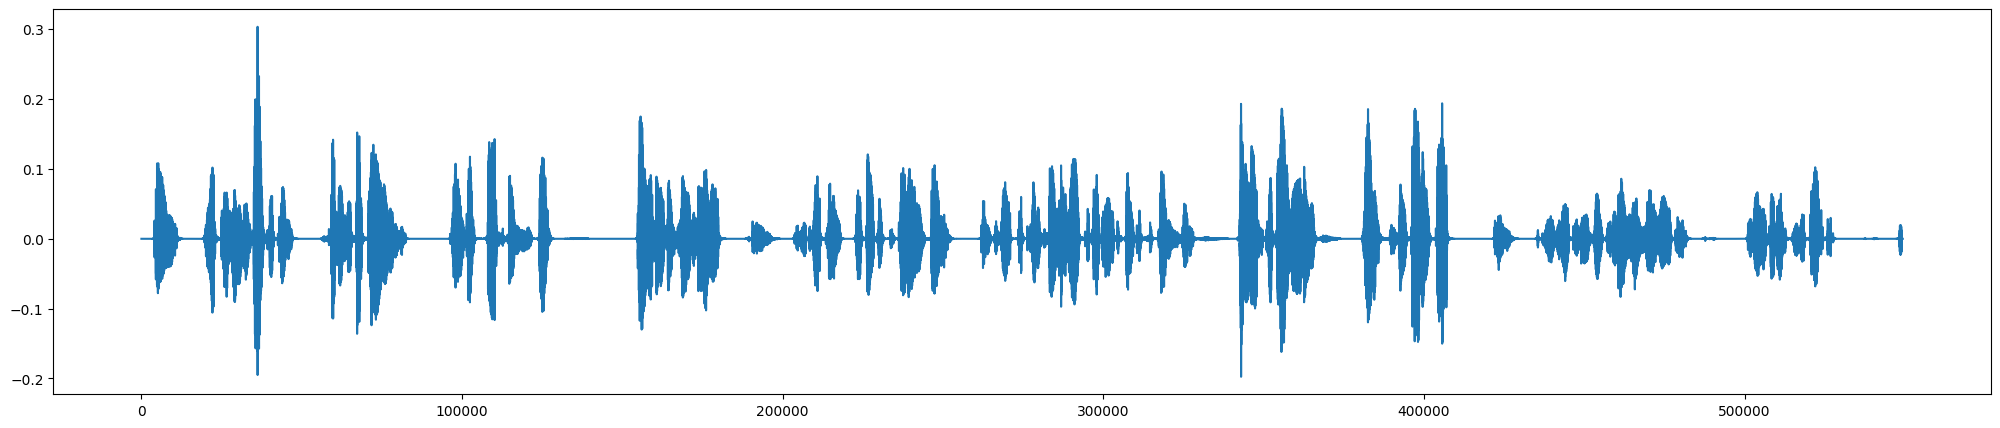

In [ ]:
fig, ax = plt.subplots(figsize=(25,5))
ax.plot(reduced_noise_st1)

In [ ]:
IPython.display.Audio(data=reduced_noise_st1, rate=rate1)

## **Removing Non-Stationary Noise**
 - keeps updating the intially estimated noise threshold during the process of noise reduction.

 - ***Non-Stationary Noise*** - noise whose statistical properties change over time.
  
  *Ex* : Enivronmental Noise (like Traffic, Crowd, Wind etc)

In [ ]:
reduced_noise_nst1 = nr.reduce_noise(y=data1, sr=rate1, n_std_thresh_stationary=0.7, stationary=False)

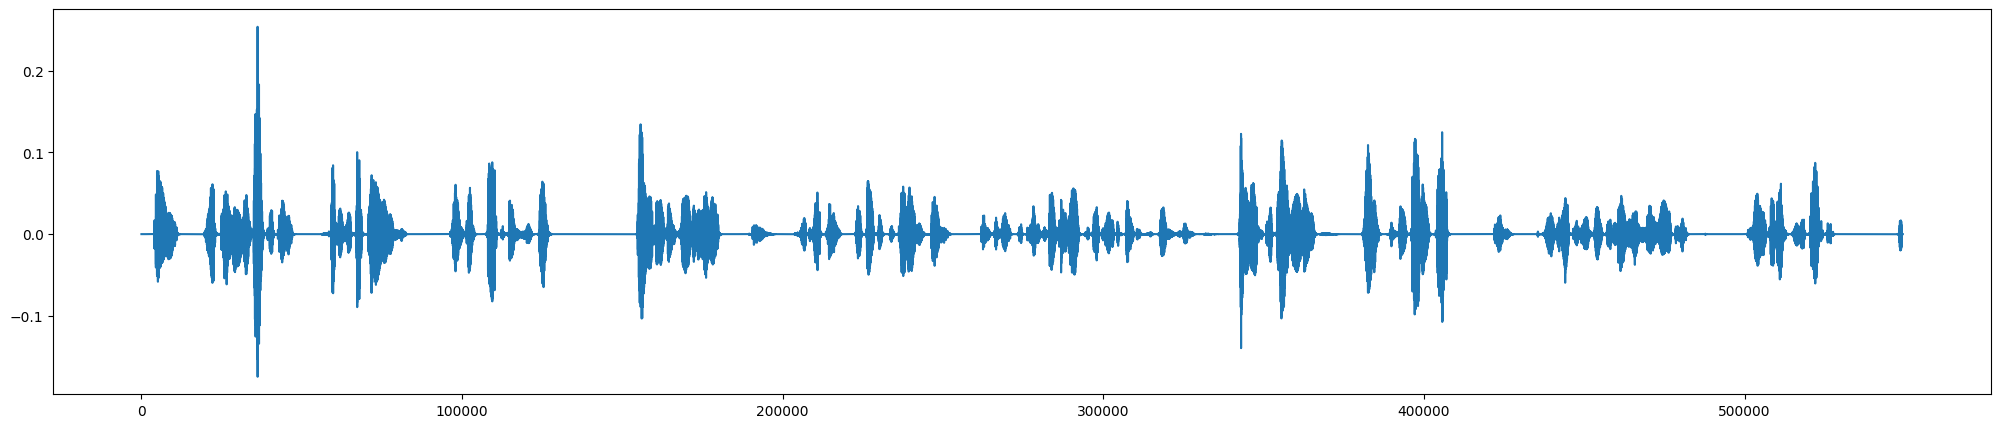

In [ ]:
fig, ax = plt.subplots(figsize=(25,5))
ax.plot(reduced_noise_nst1)

In [ ]:
IPython.display.Audio(data=reduced_noise_nst1, rate=rate1)

In [ ]:
output_path = "/content/noise_cancelled_audio.wav"
sf.write(output_path, reduced_noise_st1, rate1)

# **Install & Update of OpenAI 's Whisper AI -**

***Whisper AI*** :
It is a Speech Recognition & Transcription Model/Software that uses AI to convert speech to text

In [ ]:
!pip install git+https://github.com/openai/whisper.git
!sudo apt update && sudo apt install ffmpeg

  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-i282tpz9
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-i282tpz9
  Resolved https://github.com/openai/whisper.git to commit b38a1f20f4b23f3f3099af2c3e0ca95627276ddf
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 76.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.1/153.1 kB 19.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
  

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:2 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Fetched 338 kB in 1s (260 kB/s)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
24 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building 

## **Running Whisper AI on the Audio File:**

In [ ]:
# Define the command for Whisper
whisper_command = f"whisper {output_path} --model medium --language English --task translate"

# Execute the Whisper command in smaller steps
process = subprocess.Popen(whisper_command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
stdout, stderr = process.communicate()

# Print the output and error messages
print("Whisper Output: \n", stdout.decode('utf-8'))
print("Whisper Error:", stderr.decode('utf-8'))

Whisper Output: [00:00.000 --> 00:07.520]  But I kind of started just feeling a bit low and wound up about things, but I don't know,
[00:07.520 --> 00:12.320]  just recently I just can't really be bothered to do anything at all.
[00:12.320 --> 00:17.720]  I kind of find it hard to get motivated for things and I want to be, I really want to
[00:17.720 --> 00:23.440]  be better, but it's just kind of reaching the end now where I just, I want to do something
[00:23.440 --> 00:23.940]  about it.

Whisper Error: 


In [6]:
!pip install openai

In [7]:
import openai

# Set up your OpenAI API key
api_key = "key"
openai.api_key = api_key

In [9]:
with open(output_path, 'rb') as file:
    text_to_classify = file.read().decode('ISO-8859-1')

# Define the classify_conversation function
def classify_conversation(conversation_text, temperature=0.2):
    classification_prompt = f"Classify conversation into one of Maslow's needs:\n\n{conversation_text} only give the maslow need"
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant that classifies Maslow's needs."},
            {"role": "user", "content": classification_prompt}
        ],
    )
    classification = response['choices'][0]['message']['content'].strip()
    return classification

# Define the generate_therapist_response function
def generate_therapist_response(conversation_text, maslow_category, temperature=0.2):
    therapist_prompt = f"Assume yourself to be a therapist and provide a therapist-like response to offer some guidance and tips on managing stress and finding a better work-life balance. I could really use some support and advice right now, for the following conversation in the {maslow_category} category:\n\n{conversation_text}"
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful therapist providing guidance."},
            {"role": "user", "content": therapist_prompt}
        ],
    )
    therapist_response = response['choices'][0]['message']['content'].strip()
    return therapist_response

# Classify the conversation
maslow_category = classify_conversation(text_to_classify, temperature=0.2)

# Generate a therapist-like response
therapist_response = generate_therapist_response(text_to_classify, maslow_category, temperature=0.2)

print("Maslow need:", maslow_category)
print(therapist_response)


Maslow need: Esteem need
I can understand how difficult it can be when you're feeling low and lacking motivation. It's great that you recognize the desire to make a change and improve your situation. Let's focus on managing stress and finding a better work-life balance, as these are key factors that can contribute to your current state. 

First, it might be helpful to identify the specific stressors in your life. Are there certain aspects of your work or personal life that are causing you to feel overwhelmed or drained? When you identify these stressors, you can start working on strategies to address them.

One effective approach is to prioritize self-care. Make sure you are getting enough sleep, eating well, and engaging in regular physical activity. Taking care of your basic needs can significantly impact your overall well-being. Additionally, consider incorporating relaxation techniques into your routine, such as deep breathing exercises, meditation, or engaging in activities that b

In [10]:
# Define file paths for saving the results
output_file_path = '/content/maslow_and_response.txt'

# Save the Maslow category and therapist response to a text file
with open(output_file_path, 'w') as output_file:
    output_file.write(f"Maslow need: {maslow_category}\n")
    output_file.write(f"Therapist Response:\n{therapist_response}\n")

print("Results saved to:", output_file_path)

Results saved to: /content/maslow_and_response.txt
